<a href="https://colab.research.google.com/github/Pkun-college/whatsapp-gorupchat-analysis/blob/main/Whatsapp_grp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=feb4b492181c41881ffd7640c76db1c9650bc0abcd868c1cda0fee881a61e75c
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import re
import datetime
import regex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import matplotlib
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
       
        raw_string = ' '.join(raw_data.read().split('\n')) 
        user_msg = re.split(split_formats[key], raw_string) [1:] 
        date_time = re.findall(split_formats[key], raw_string) 
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg})
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) 
        if(a[1:]): 
            usernames.append(a[1])
            msgs.append(a[2])
        else: 
            usernames.append("group_notification")
            msgs.append(a[0])
      
    df['user'] = usernames
    df['message'] = msgs

    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [ ]:
df = rawToDf('/content/whatsapp-chat-data.txt', '12hr')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


In [ ]:
df.sample(10)

,date_time,user,message
8130,2020-06-27 11:03:00,"Harsh Kapadia (TSEC IT, SE)",Join this though 👍
5782,2020-05-06 21:53:00,"Saurav Upoor (TSEC CS, SE)",blog k comments padho mast h
5861,2020-05-08 13:50:00,"Saket (TSEC, CS)",*Effectively* kya hota yaar
6340,2020-05-16 21:40:00,"Dheeraj Lalwani (TSEC, CS)",Great animations! What all did you use?
10891,2020-08-27 21:48:00,"Tanay Kamath (TSEC, CS)",😂😂😂
13449,2020-09-30 12:54:00,"Trushant Narwani (TSEC, CS)",i got it within a few minutes after enrolling
546,2020-02-04 22:15:00,+91 91680 38866,This message was deleted
4340,2020-04-03 22:15:00,"Saurav Upoor (TSEC CS, SE)",nice i had thought about it but didnt think th...
5122,2020-04-22 01:44:00,"Pratik K (TSEC CS, SE)",💯💯
5145,2020-04-23 18:45:00,"Tanay Kamath (TSEC, CS)",😂


In [ ]:
df.user.unique()

array(['group_notification', '+91 96536 93868',
       'Dheeraj Lalwani (TSEC, CS)', '+91 99201 75875', '+91 95949 08570',
       '+91 79778 76844', '+91 90499 38860', 'Tanay Kamath (TSEC, CS)',
       'Saket (TSEC, CS)', '+91 77568 95072', 'Rohit Pathak (TSEC, CS)',
       '+91 75078 05454', 'Darshan Rander (TSEC, IT)', '+91 79774 68083',
       '+91 70394 60876', '+91 96191 55044', '+91 90678 93300',
       'Mohit Varma (TSEC, CS)', '+91 79770 56210',
       'Chirag Sharma (TSEC, CS)', 'Vivek Iyer (TSEC, Biomed)',
       'Tushar Nankani', '+91 81696 22410', '+91 89764 07509',
       '+91 78758 66747', 'Ankit (TSEC, CS)', '+91 86556 33169',
       '+91 76663 28147', '+91 88284 70904', '+91 97698 67348',
       'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)', '+91 91680 38866',
       'Pranay Thakur (TSEC, CS)', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+9

In [ ]:
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.distinct_emoji_list(word) for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
total_messages = df.shape[0]
print("Group")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

0
3662
Group
Messages: 13655
Media: 0
Emojis: 3662
Links: 459


In [ ]:
df1 = df.copy()      
df1['message_count'] = [1] * df1.shape[0]      
df1 = df1.groupby('date_time').sum().reset_index()  
df1

,date_time,urlcount,message_count
0,2020-01-24 20:25:00,0,1
1,2020-01-26 16:19:00,0,2
2,2020-01-26 16:20:00,0,2
3,2020-01-26 16:22:00,0,2
4,2020-01-26 16:23:00,0,3
...,...,...,...
7107,2020-10-02 01:58:00,0,2
7108,2020-10-02 02:05:00,0,3
7109,2020-10-02 02:11:00,0,1
7110,2020-10-02 02:28:00,0,1


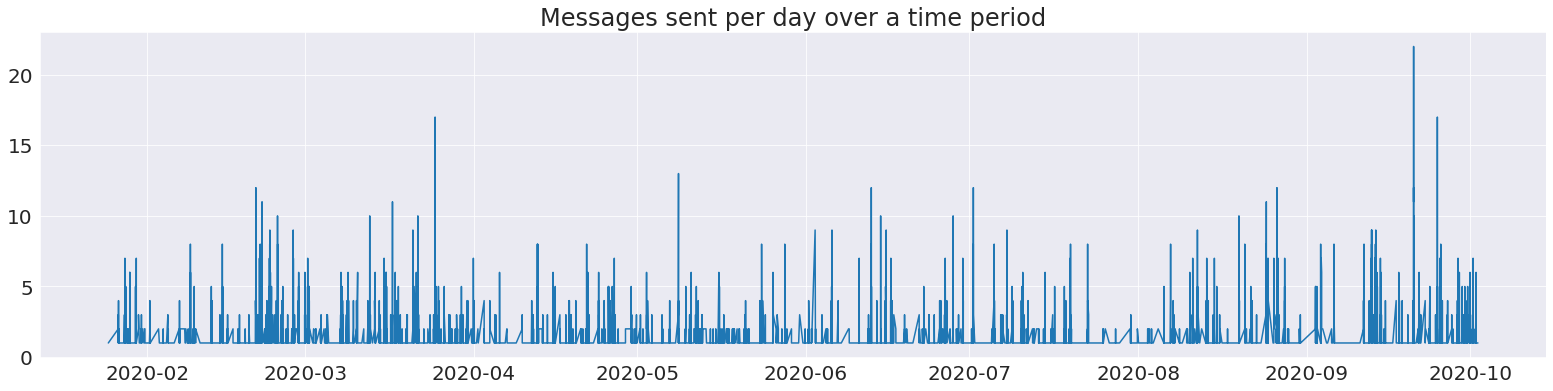

In [ ]:

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)     
plt.plot(df1.date_time, df1.message_count)
plt.title('Messages sent per day over a time period');
plt.savefig('msg_plots.svg', format = 'svg')

In [ ]:
media_messages_df = df[df['message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Aneri Shah (TSEC, CS)", "Mittul Dasani (TSEC, CS)", "Pranay Thakur (TSEC, CS)"]
for i in range(len(l)):
  
  req_df= messages_df[messages_df["user"] == l[i]]
  
  print(f'Stats of {l[i]} -')
  
  print('Messages Sent', req_df.shape[0])
  
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
 
  media = media_messages_df[media_messages_df['user'] == l[i]].shape[0]
  print('Media Messages Sent', media)
 
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)

  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13655 entries, 0 to 13654
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
 3   emoji      13655 non-null  object        
 4   urlcount   13655 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 640.1+ KB
Stats of Aneri Shah (TSEC, CS) -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Mittul Dasani (TSEC, CS) -
Messages Sent 29
Words per message 5.931034482758621
Media Messages Sent 0
Emojis Sent 0
Links Sent 2

Stats of Pranay Thakur (TSEC, CS) -
Messages Sent 1
Words per message 2.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 1



In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 1886)
('👍', 258)
('🔥', 244)
('😅', 220)
('💯', 180)
('🤣', 128)
('👏', 72)
('🙏', 62)
('😭', 48)
('🤔', 36)
('👌', 29)
('🙄', 28)
('🙌', 21)
('😢', 21)
('🙈', 21)
('🤯', 16)
('🤩', 16)
('😍', 15)
('😁', 14)
('🙁', 12)
('🥳', 12)
('🥺', 11)
('😎', 11)
('😓', 11)
('⚒', 11)
('🙃', 10)
('✅', 9)
('😶', 8)
('💪', 8)
('🤞', 8)
('🎉', 8)
('😊', 7)
('😤', 7)
('✌', 6)
('☝', 6)
('🙂', 6)
('❤', 6)
('🎂', 6)
('😡', 6)
('💻', 5)
('👀', 5)
('😱', 5)
('✨', 5)
('💛', 5)
('😳', 5)
('🛑', 5)
('🤟', 4)
('🤨', 4)
('😄', 4)
('😃', 4)
('🥴', 4)
('🤮', 4)
('😕', 4)
('🤗', 4)
('🖥', 3)
('👆', 3)
('😐', 3)
('🌚', 3)
('✋', 3)
('😇', 3)
('😉', 3)
('😋', 3)
('⚡', 3)
('😒', 3)
('🤦', 2)
('😔', 2)
('😫', 2)
('🤪', 2)
('⛈', 2)
('🥇', 2)
('📜', 2)
('😜', 2)
('🤫', 2)
('😌', 2)
('🧐', 2)
('😛', 2)
('😖', 2)
('🎯', 2)
('🥱', 2)
('😏', 2)
('🔶', 2)
('📚', 2)
('📝', 2)
('🔴', 2)
('🤢', 2)
('⭐️', 2)
('😑', 1)
('❌', 1)
('🎊', 1)
('☠', 1)
('🤒', 1)
('🤚', 1)
('🤙', 1)
('😞', 1)
('😵', 1)
('😯', 1)
('👊', 1)
('⚡️', 1)
('🗓', 1)
('⏱', 1)
('🤭', 1)
('😈', 1)
('💸', 1)
('🤧', 1)
('😪', 1)
('🤐', 1)
('🤕', 1)
('

There are 504801 words in all the messages.


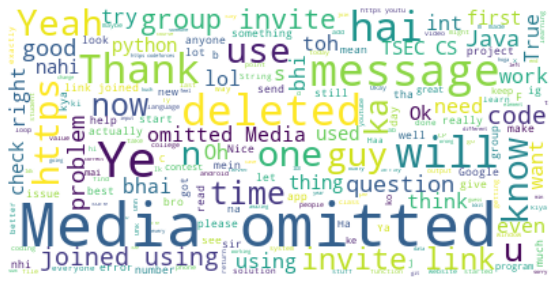

In [ ]:
text = " ".join(review for review in messages_df.message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()